In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import numpy as np

In [2]:
df_BM = pd.read_csv('../../datasets/Join Collection NSC2_BND_M20.csv')
df_BM ## 고혈압환자들만 select

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
0,0,3000,1921LE,200805.0,1,0,30,5.0,2002
1,1,6000,1921LE,200805.0,1,0,60,5.0,2002
2,2,3000,1921LE,200805.0,1,0,30,5.0,2002
3,3,4200,1921LE,200805.0,23,0,7,1.0,2007
4,4,1500,1921LE,201409.0,1,0,7,5.0,2004
...,...,...,...,...,...,...,...,...,...
4624,4624,3000,2005,NaN,1,0,30,1.0,2005
4625,4625,3000,2005,NaN,1,0,30,1.0,2005
4626,4626,3000,2005,NaN,1,0,30,1.0,2005
4627,4627,3000,2005,NaN,1,0,30,1.0,2006


In [3]:
condition = (df_BM['BTH_YYYY'] != '1921LE')
df_BMA = df_BM[condition]
df_BMA

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY
11,11,8580,1926,201808.0,1,0,0,1.0,2006
12,12,2900,1926,201808.0,1,0,30,1.0,2008
13,13,2900,1926,201808.0,1,0,30,1.0,2008
14,14,2900,1926,201808.0,1,0,14,1.0,2008
15,15,3500,1926,201808.0,1,0,30,1.0,2008
...,...,...,...,...,...,...,...,...,...
4624,4624,3000,2005,NaN,1,0,30,1.0,2005
4625,4625,3000,2005,NaN,1,0,30,1.0,2005
4626,4626,3000,2005,NaN,1,0,30,1.0,2005
4627,4627,3000,2005,NaN,1,0,30,1.0,2006


In [4]:
df_BMA['BTH_Y']=pd.to_datetime(df_BMA['BTH_YYYY'].astype(str))

C:\Users\01-15\AppData\Local\Temp\ipykernel_12036\1629062973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['BTH_Y']=pd.to_datetime(df_BMA['BTH_YYYY'].astype(str))


In [5]:
def present(birth_year):
    current_year = pd.to_datetime('today').year  # 현재 연도 가져오기
    return current_year - birth_year.year 
## chatGPT에게 도움을 받음. 

In [6]:
df_BMA['Age']=df_BMA['BTH_Y'].apply(present) ## 2023년 기준 나이로 계산

C:\Users\01-15\AppData\Local\Temp\ipykernel_12036\1676463516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['Age']=df_BMA['BTH_Y'].apply(present) ## 2023년 기준 나이로 계산


In [7]:
## 현재 기준으로 진료 받은 년차
def disease(year) :
    result = 2023 - year
    return result

In [8]:
df_BMA['disease_year']= df_BMA['STD_YYYY'].apply(disease)

C:\Users\01-15\AppData\Local\Temp\ipykernel_12036\4100314602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_BMA['disease_year']= df_BMA['STD_YYYY'].apply(disease)


In [9]:
df_BMA[:5]

,Unnamed: 0,EDC_SBA,BTH_YYYY,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY,BTH_Y,Age,disease_year
11,11,8580,1926,201808.0,1,0,0,1.0,2006,1926-01-01,97,17
12,12,2900,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15
13,13,2900,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15
14,14,2900,1926,201808.0,1,0,14,1.0,2008,1926-01-01,97,15
15,15,3500,1926,201808.0,1,0,30,1.0,2008,1926-01-01,97,15


#### DDA 변수 분석 결과
- EDC_SBA = 심결본인부담금: 연속형
- Age = 생년월일-사망월일로 진행하려 했으나 데이터의 일관성이 없었고 DTH의 null값이 대부분이라 출생년도 1921부터 2023년 현재 생존한 환자로 확인 (현재연령- 연속형)
- TOT_PRSC_DD_CNT= 총 처방일수: 연속형 
- disease_year-첫 진료받은 년도: 범주형 가능할듯. 12~21년 (2023년 기준)

### 연령-심결본인부담금
- 연속-연속
- lmplot?histplot?scatter?
-  ⇒ 전체 연관성이 보이지 않음. 
-  ⇒ 50-60 대 사이에서 본인부담금이 높은것으로 보여짐. 

<Axes: xlabel='Age', ylabel='EDC_SBA'>

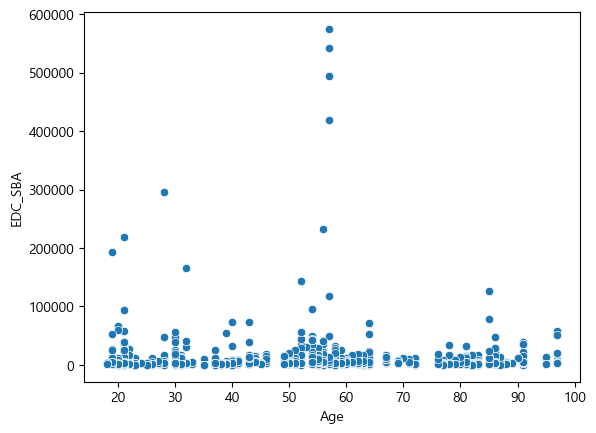

In [10]:
sns.scatterplot(data=df_BMA, x='Age', y='EDC_SBA')

In [11]:
df_BMA[['Age','EDC_SBA']].corr()

,Age,EDC_SBA
Age,1.000000,-0.011429
EDC_SBA,-0.011429,1.000000


In [12]:
df_BMA_age = pd.pivot_table(data=df_BMA, index='Age', aggfunc=sum)
df_BMA_age['Age_expense']=df_BMA_age.index

C:\Users\01-15\AppData\Local\Temp\ipykernel_12036\176395773.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_BMA_age = pd.pivot_table(data=df_BMA, index='Age', aggfunc=sum)


In [13]:
df_BMA.describe()

,Unnamed: 0,EDC_SBA,DTH_YYYYMM,MCARE_SUBJ_CD,OPRTN_YN,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,STD_YYYY,Age,disease_year
count,4618.000000,4618.000000,362.000000,4618.000000,4618.000000,4618.000000,4194.000000,4618.000000,4618.000000,4618.000000
mean,2319.500000,4613.659593,201598.121547,1.927025,0.005847,32.557601,1.894850,2006.933738,53.174318,16.066262
std,1333.246101,17925.723626,276.155165,4.392297,0.229341,19.970886,1.747379,2.412593,21.908629,2.412593
min,11.000000,0.000000,201009.000000,0.000000,0.000000,0.000000,1.000000,2002.000000,18.000000,12.000000
25%,1165.250000,1500.000000,201508.000000,1.000000,0.000000,30.000000,1.000000,2005.000000,32.000000,14.000000
50%,2319.500000,2900.000000,201508.000000,1.000000,0.000000,30.000000,1.000000,2007.000000,55.000000,16.000000
75%,3473.750000,3100.000000,201808.000000,1.000000,0.000000,30.000000,1.000000,2009.000000,69.000000,18.000000
max,4628.000000,574770.000000,202102.000000,24.000000,9.000000,190.000000,9.000000,2011.000000,97.000000,21.000000


###  총 처방일수-심결본인부담금
- 연속-연속
- TOT_PRSC_DD_CNT scatter?
-  ⇒ 총 처방일수와 본인부담금의 연관성이 보이지 않음. 

<Axes: xlabel='TOT_PRSC_DD_CNT', ylabel='EDC_SBA'>

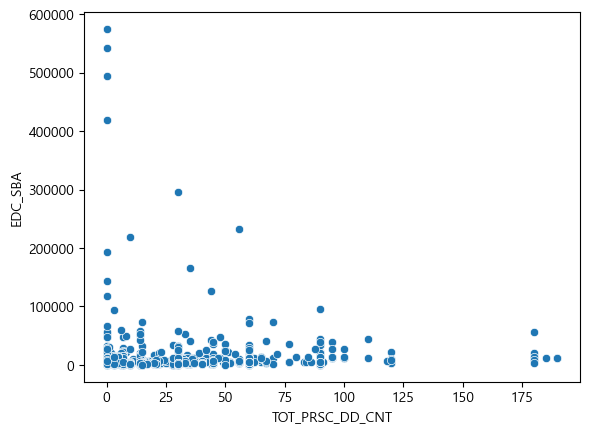

In [14]:
sns.scatterplot(data=df_BMA, x='TOT_PRSC_DD_CNT', y='EDC_SBA')

In [15]:
df_BMA[['TOT_PRSC_DD_CNT','EDC_SBA']].corr()

,TOT_PRSC_DD_CNT,EDC_SBA
TOT_PRSC_DD_CNT,1.000000,-0.021871
EDC_SBA,-0.021871,1.000000


###  질병년차-심결본인부담금
- 범주-연속
- disease_year: 2023- 첫 진료받은 년도
- ⇒ 진료진단 받은 년차가 오래되었을수록 본인부담금의 누적이 클것이라고 예상했으나 13년차에서 가장 많았음. 다른 이유가 있을것으로 예상됨. 

<Axes: xlabel='disease_year', ylabel='EDC_SBA'>

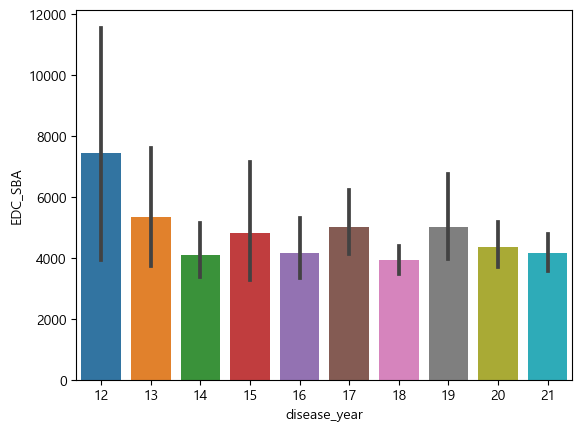

In [16]:
sns.barplot(data=df_BMA, x='disease_year', y='EDC_SBA',)

In [17]:
df_BMA_year=pd.pivot_table(data=df_BMA, index='disease_year', aggfunc=sum)
df_BMA_year['year_Disease']=df_BMA_year.index

C:\Users\01-15\AppData\Local\Temp\ipykernel_12036\1012462435.py:1: FutureWarning: The operation <built-in function sum> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_BMA_year=pd.pivot_table(data=df_BMA, index='disease_year', aggfunc=sum)


In [18]:
df_BMA_year

,Age,DTH_YYYYMM,EDC_SBA,MCARE_RSLT_TYPE,MCARE_SUBJ_CD,OPRTN_YN,STD_YYYY,TOT_PRSC_DD_CNT,Unnamed: 0,year_Disease
disease_year,,,,,,,,,,
12,1041,0.0,134100,10.0,2,0,36198,285,37150,12
13,42682,17136671.0,4114690,792.0,1513,9,1547700,25281,1690550,13
14,39256,13508092.0,2944570,743.0,1494,0,1440453,23327,1602939,14
15,37233,12693565.0,3417850,774.0,1334,0,1427688,22782,1677981,15
16,29389,8465759.0,2389000,679.0,853,0,1156032,18750,1403029,16
17,24616,6857532.0,2418950,482.0,875,9,964886,16075,1167713,17
18,22004,4234360.0,1655280,527.0,605,0,848115,13973,1007959,18
19,21827,6249707.0,2024550,1692.0,743,0,811620,12459,921593,19
20,15402,1815274.0,1281580,1237.0,869,9,588882,9664,698427,20


<Axes: xlabel='year_Disease', ylabel='EDC_SBA'>

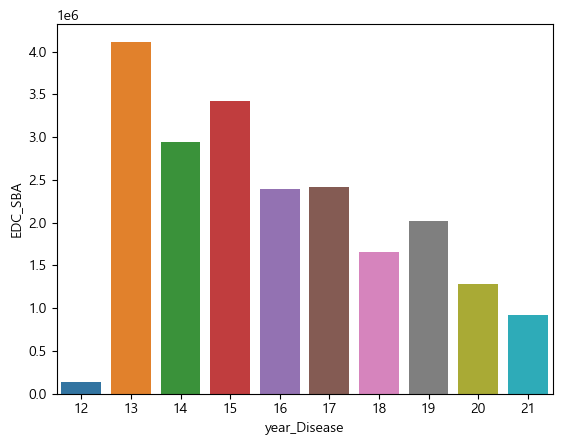

In [19]:
sns.barplot(data=df_BMA_year, x='year_Disease', y='EDC_SBA',)